<a href="https://colab.research.google.com/github/LazaroR-u/QubitxQubit/blob/main/Noise_Circuit_SWAP_test_Week_17_Homework_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 17: Noisy Simulations and Benchmarking**
---

### **Description**
In this week's homework, you will practice running noisy simulations and characterizing the effects of noise using the swap test.

<br>

### **Structure**
**Part 1**: [Noisy Simulations](#p1)


**Part 2**: [Noise Characterization with the Swap Test](#p2)


<br>

### **Learning Objectives**
By the end of this notebook, we will:
* Recognize how to run simulations in cirq with noise throughout a circuit and at specific moments of a circuit.
* Recognize how to use the swap test to measure fidelity.
* Recognize how to use the swap test to characterize noise in a circuit.

<br>

### **Resources**
* [Noisy Simulations Cheat Sheet
](https://docs.google.com/document/d/1Ex2m3dp5-_z8XN8EiBv6PUptHWrTLDpsKYU662oTy4A/edit#heading=h.exb19quwqzr9)


* [Cirq Cheat Sheet](https://docs.google.com/document/d/1j0vEwtS6fK-tD1DWAPry4tJdxEiq8fwMtXuYNGRhK_M)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**


In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

def binary_labels(num_qubits):
    return [bin(x)[2:].zfill(num_qubits) for x in range(2 ** num_qubits)]
plt.rcParams.update({'font.size': 8})

try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install cirq --quiet
    import cirq
    print("installed cirq.")

installing cirq...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.8/598.8 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.8/223.8 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.6 MB/s eta 0:00:00
     

<a name="p1"></a>

---
## **Part 1: Noisy Simulations**
---

In this section, you will focus on creating and interpreting noisy circuits.

#### **Problem #1.1**

Simulate a circuit 100 times that prepares a single qubit in the $|1\rangle$ state with a 12% chance of depolarization throughout the whole circuit.

##### **Solution**

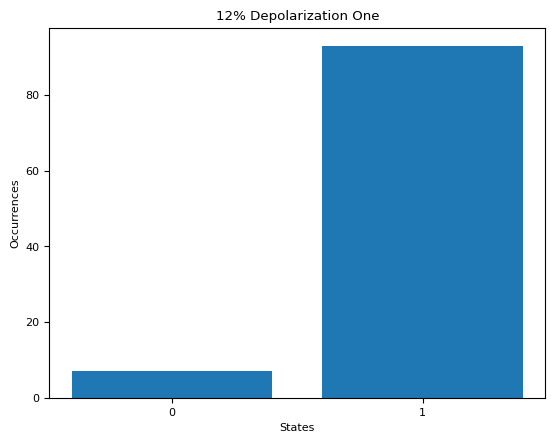

In [ ]:
# Create the circuit
qubit = cirq.NamedQubit('q0')
circuit = cirq.Circuit()

circuit.append(cirq.X(qubit))
circuit.append(cirq.measure(qubit))


# Simulate the circuit with noise
noise = cirq.depolarize(0.12)

sim = cirq.Simulator()
result = sim.run(circuit.with_noise(noise), repetitions = 100)


# Plot the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = '12% Depolarization One', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))
plt.show()

#### **Problem #1.2**

Simulate a circuit 100 times that prepares a single qubit in the $|+\rangle$ state with a 12% chance of depolarization throughout the whole circuit.

##### **Solution**

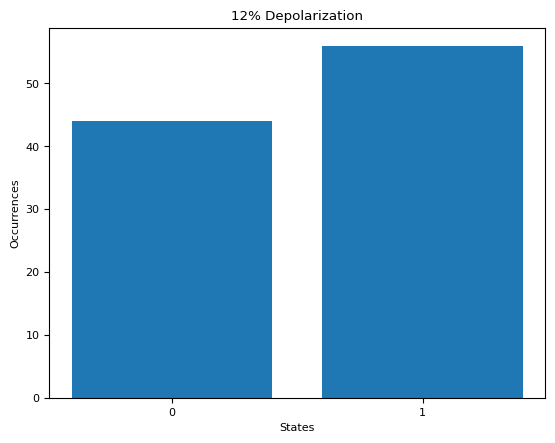

In [ ]:
# Create the circuit
qubit = cirq.NamedQubit('q0')
circuit = cirq.Circuit()

circuit.append(cirq.X(qubit))
circuit.append(cirq.H(qubit))
circuit.append(cirq.measure(qubit))


# Simulate the circuit with noise
noise = cirq.depolarize(0.12)

sim = cirq.Simulator()
result = sim.run(circuit.with_noise(noise), repetitions = 100)


# Plot the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = '12% Depolarization', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))
plt.show()

#### **Problem #1.3**

Simulate a circuit 100 times that prepares three qubits in the $\frac{1}{\sqrt 2}(|000\rangle + |111\rangle)$ (GHZ) state with no noise.

<br>

**Hint**: Preparing this state is the exact same as preparing the $\frac{1}{\sqrt 2}(|00\rangle + |11\rangle)$ (Bell) state, except a CNOT must be used to entangle the 0th and 2nd qubits too. You can also find the circuity needed for this by simply googling "GHZ state circuit in cirq" and making sure you're considering the 3 qubit case.

##### **Solution**

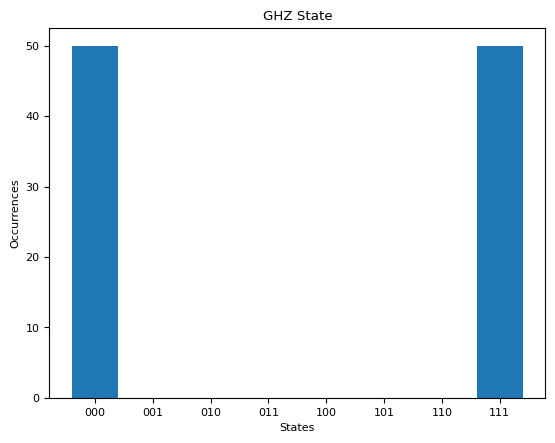

In [ ]:
# Create the circuit
qubits = cirq.NamedQubit.range(3, prefix = 'q')
circuit = cirq.Circuit()

circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.CNOT(qubits[0], qubits[1]))
circuit.append(cirq.CNOT(qubits[0], qubits[2]))

circuit.append(cirq.measure(qubits))


# Simulate the circuit

sim = cirq.Simulator()
result = sim.run(circuit, repetitions = 100)


# Plot the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'GHZ State', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(3))
plt.show()

#### **Problem #1.4**

Simulate a circuit 100 times that prepares three qubits in the $\frac{1}{\sqrt 2}(|000\rangle + |111\rangle)$ state with a 25% chance of depolarization throughout the whole circuit.

##### **Solution**

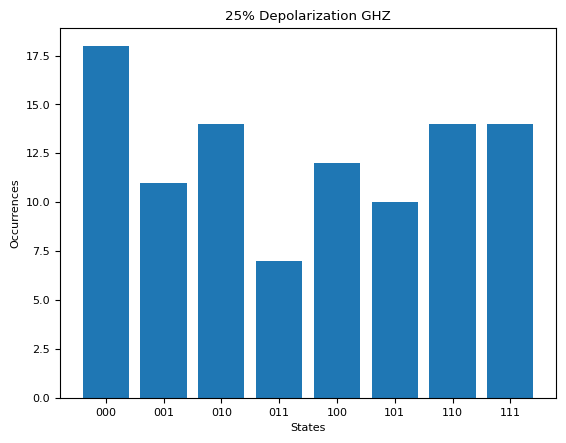

In [ ]:
# Create the circuit
qubits = cirq.NamedQubit.range(3, prefix = 'q')
circuit = cirq.Circuit()

circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.CNOT(qubits[0], qubits[1]))
circuit.append(cirq.CNOT(qubits[0], qubits[2]))

circuit.append(cirq.measure(qubits))


# Simulate the circuit with noise
noise = cirq.depolarize(0.25)

sim = cirq.Simulator()
result = sim.run(circuit.with_noise(noise), repetitions = 100)


# Plot the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = '25% Depolarization GHZ', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(3))
plt.show()

#### **Problem #1.5**

Simulate a circuit 100 times that prepares three qubits in the $\frac{1}{\sqrt 2}(|000\rangle + |111\rangle)$ state with a 25% chance of a phase flip throughout the whole circuit.

<br>

**Hint**: There is only one adjustment that needs to be made from above. You can find it on the cheat sheet.

##### **Solution**

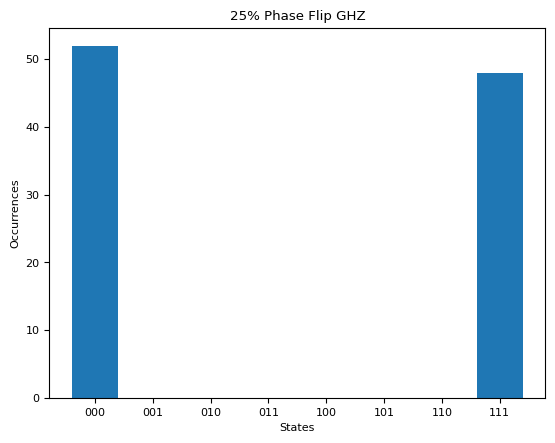

In [ ]:
# Create the circuit
qubits = cirq.NamedQubit.range(3, prefix = 'q')
circuit = cirq.Circuit()

circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.CNOT(qubits[0], qubits[1]))
circuit.append(cirq.CNOT(qubits[0], qubits[2]))

circuit.append(cirq.measure(qubits))


# Simulate the circuit with noise
noise = cirq.phase_flip(0.25)

sim = cirq.Simulator()
result = sim.run(circuit.with_noise(noise), repetitions = 100)


# Plot the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = '25% Phase Flip GHZ', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(3))
plt.show()

#### **Problem #1.6**

Simulate a circuit 100 times that prepares three qubits in the $\frac{1}{\sqrt 2}(|000\rangle + |111\rangle)$ state with a 25% chance of amplitude damping throughout the whole circuit.

<br>

**Hint**: There is only one adjustment that needs to be made from above. You can find it on the cheat sheet.

##### **Solution**

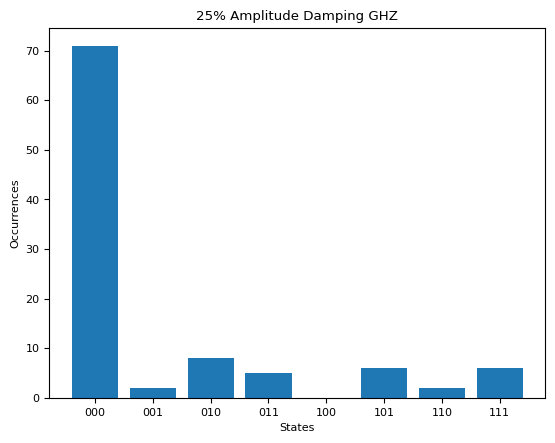

In [ ]:
# Create the circuit
qubits = cirq.NamedQubit.range(3, prefix = 'q')
circuit = cirq.Circuit()

circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.CNOT(qubits[0], qubits[1]))
circuit.append(cirq.CNOT(qubits[0], qubits[2]))

circuit.append(cirq.measure(qubits))


# Simulate the circuit with noise
noise = cirq.amplitude_damp(0.25)

sim = cirq.Simulator()
result = sim.run(circuit.with_noise(noise), repetitions = 100)


# Plot the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = '25% Amplitude Damping GHZ', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(3))
plt.show()

#### **Problem #1.7**

Simulate a circuit 100 times that prepares three qubits in the $\frac{1}{\sqrt 2}(|000\rangle + |111\rangle)$ state with a 25% chance of amplitude damping *only* before the first gate, on all qubits.

<br>

**Hint**: There is only one adjustment that needs to be made from above. You can find it on the cheat sheet.

##### **Solution**

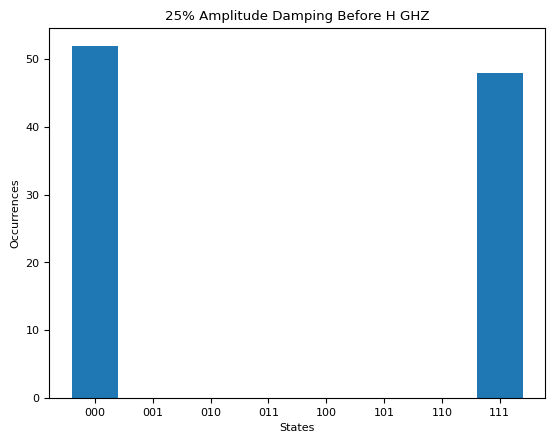

In [ ]:
# Create the circuit
qubits = cirq.NamedQubit.range(3, prefix = 'q')
circuit = cirq.Circuit()

noise = cirq.amplitude_damp(0.25)

circuit.append(noise.on_each(qubits))
circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.CNOT(qubits[0], qubits[1]))
circuit.append(cirq.CNOT(qubits[0], qubits[2]))

circuit.append(cirq.measure(qubits))


# Simulate the circuit with noise
sim = cirq.Simulator()
result = sim.run(circuit, repetitions = 100)


# Plot the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = '25% Amplitude Damping Before H GHZ', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(3))
plt.show()

#### **Problem #1.8**

Simulate a circuit 100 times that prepares three qubits in the $\frac{1}{\sqrt 2}(|000\rangle + |111\rangle)$ state with a 25% chance of amplitude damping *only* between the H and the CNOT gates, on all qubits.

##### **Solution**

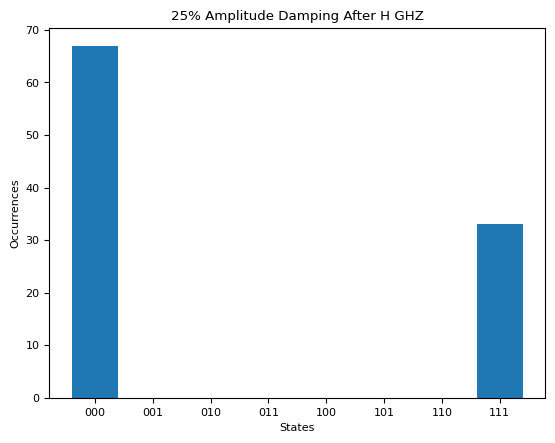

In [ ]:
# Create the circuit
qubits = cirq.NamedQubit.range(3, prefix = 'q')
circuit = cirq.Circuit()

noise = cirq.amplitude_damp(0.25)


circuit.append(cirq.H(qubits[0]))
circuit.append(noise.on_each(qubits))
circuit.append(cirq.CNOT(qubits[0], qubits[1]))
circuit.append(cirq.CNOT(qubits[0], qubits[2]))

circuit.append(cirq.measure(qubits))


# Simulate the circuit with noise
sim = cirq.Simulator()
result = sim.run(circuit, repetitions = 100)


# Plot the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = '25% Amplitude Damping After H GHZ', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(3))
plt.show()

#### **Problem #1.9**

Simulate a circuit 100 times that prepares three qubits in the $\frac{1}{\sqrt 2}(|000\rangle + |111\rangle)$ state with a 25% chance of amplitude damping *only* between the the CNOT gates, on all qubits.

##### **Solution**

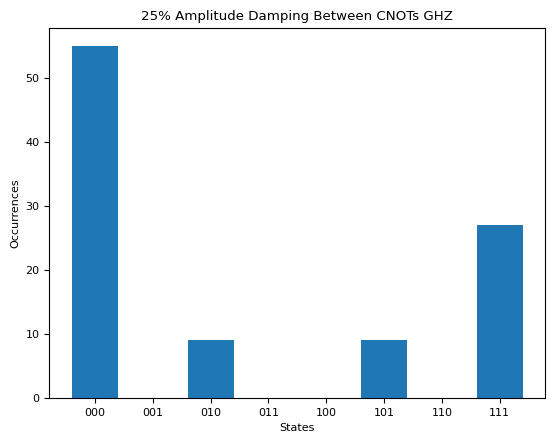

In [ ]:
# Create the circuit
qubits = cirq.NamedQubit.range(3, prefix = 'q')
circuit = cirq.Circuit()

noise = cirq.amplitude_damp(0.25)


circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.CNOT(qubits[0], qubits[1]))
circuit.append(noise.on_each(qubits))
circuit.append(cirq.CNOT(qubits[0], qubits[2]))

circuit.append(cirq.measure(qubits))


# Simulate the circuit with noise
sim = cirq.Simulator()
result = sim.run(circuit, repetitions = 100)


# Plot the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = '25% Amplitude Damping Between CNOTs GHZ', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(3))
plt.show()

#### **Problem #1.10**

Simulate a circuit 100 times that prepares three qubits in the $\frac{1}{\sqrt 2}(|000\rangle + |111\rangle)$ state with a 25% chance of amplitude damping *only* after the CNOT gates, on all qubits.

##### **Solution**

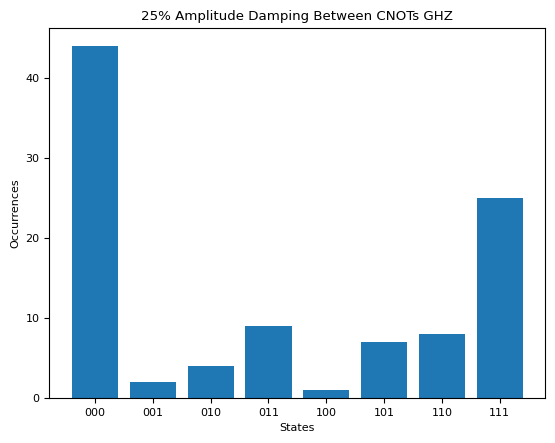

In [ ]:
# Create the circuit
qubits = cirq.NamedQubit.range(3, prefix = 'q')
circuit = cirq.Circuit()

noise = cirq.amplitude_damp(0.25)


circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.CNOT(qubits[0], qubits[1]))
circuit.append(cirq.CNOT(qubits[0], qubits[2]))
circuit.append(noise.on_each(qubits))

circuit.append(cirq.measure(qubits))


# Simulate the circuit with noise
sim = cirq.Simulator()
result = sim.run(circuit, repetitions = 100)


# Plot the results
hist = cirq.plot_state_histogram(result, plt.subplot(), title = '25% Amplitude Damping Between CNOTs GHZ', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(3))
plt.show()

<a name="p2"></a>

---
## **Part 2: Noise Characterization with the Swap Test**
---

In this section, you will characterize the effect of amplitude damping on preparing the $|+\rangle$ state.

#### **Problem #2.1**

Calculate the fidelity of preparing the $|+\rangle$ state without noise and with amplitude damping for a range of probabilities from 0 to 1. Then plot the results against the given theoretical values.

<br>

**Hint**: This is nearly identical to the part of the lab and cheat sheet called "Characterizing Noise with Ideal Swap Test". However, the type of noise needs to be adjusted and the theoretical values have been updated for you.

<br>

**NOTE**: You will need to balance the number of repetitions between being too small to get consistent, precise results and being too big to take too long to run. We recommend trying around 500 or, if you're willing to be more patient, increasing to 1000 or 5000.

##### **Solution**

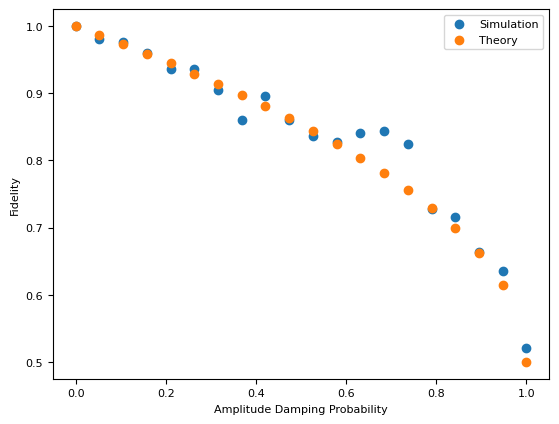

In [ ]:
noise_probabilities = np.linspace(0, 1, 20)


fidelities = []
for prob in noise_probabilities:

  # 1. PREPARE QUBITS
  #===================
  # Create qubits
  q0 = cirq.NamedQubit('state 0')
  q1 = cirq.NamedQubit('state 1')
  ancilla = cirq.NamedQubit('anc')

  # Prepare the given states
  circuit_0 = cirq.Circuit()
  circuit_0.append(cirq.H(q0))

  circuit_1 = cirq.Circuit()
  circuit_1.append(cirq.H(q1))

  circuit = circuit_0 + circuit_1.with_noise(cirq.amplitude_damp(prob))


  # 2. SWAP TEST CIRCUIT
  #======================
  # Put ancilla in superposition
  circuit.append(cirq.H(ancilla))

  # Controlled-Swap controlled by ancilla and targeting q0 and q1
  circuit.append(cirq.CSWAP(ancilla, q0, q1))

  # Apply an H gate on the ancilla.
  circuit.append(cirq.H(ancilla))

  # Measure ancilla
  circuit.append(cirq.measure(ancilla))



  # 3. RUN CIRCUIT
  #================
  simulator = cirq.Simulator()
  result = simulator.run(circuit, repetitions=500)



  # 4. CALCULATE FIDELITY
  #=======================
  prob_0 = np.sum(result.measurements['anc']) / len(result.measurements['anc'])
  fidelity = 1 - 2*prob_0

  fidelities += [fidelity]




# PLOT THE RESULTS
#==================
plt.scatter(noise_probabilities, fidelities, label = 'Simulation')

# These theoretical values only apply to amplitude damping on a single qubit in the + state
theoretical_fidelities = [1/2*(1 + (1 - p)**(1/2)) for p in noise_probabilities]
plt.scatter(noise_probabilities, theoretical_fidelities, label = 'Theory')

plt.xlabel('Amplitude Damping Probability')
plt.ylabel('Fidelity')

plt.legend()
plt.show()

#### **Problem #2.2**

Now perform the same experiment, but assuming noise on the whole swap test circuit. In other words, adjust the code from "Characterizing Noise with a Noisy Swap Test" as needed.

##### **Solution**

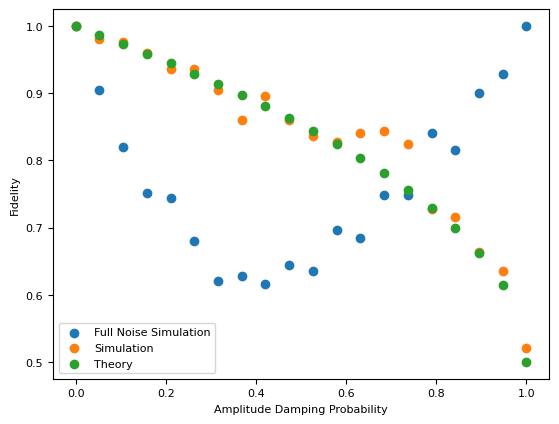

In [ ]:
noise_probabilities = np.linspace(0, 1, 20)

noisy_fidelities = []
for prob in noise_probabilities:

  # 1. PREPARE QUBITS
  #===================
  # Create qubits
  q0 = cirq.NamedQubit('state 0')
  q1 = cirq.NamedQubit('state 1')
  ancilla = cirq.NamedQubit('anc')

  # Prepare the given states
  circuit_0 = cirq.Circuit()
  circuit_0.append(cirq.H(q0))

  circuit_1 = cirq.Circuit()
  circuit_1.append(cirq.H(q1))

  circuit = circuit_0 + circuit_1


  # 2. SWAP TEST CIRCUIT
  #======================
  # Put ancilla in superposition
  circuit.append(cirq.H(ancilla))

  # Controlled-Swap controlled by ancilla and targeting q0 and q1
  circuit.append(cirq.CSWAP(ancilla, q0, q1))

  # Apply an H gate on the ancilla.
  circuit.append(cirq.H(ancilla))

  # Measure ancilla
  circuit.append(cirq.measure(ancilla))



  # 3. RUN CIRCUIT
  #================
  simulator = cirq.Simulator()
  result = simulator.run(circuit.with_noise(cirq.amplitude_damp(prob)), repetitions=500)



  # 4. CALCULATE FIDELITY
  #=======================
  prob_0 = np.sum(result.measurements['anc']) / len(result.measurements['anc'])
  fidelity = 1 - 2*prob_0

  noisy_fidelities += [fidelity]




# PLOT THE RESULTS
#==================
plt.scatter(noise_probabilities, noisy_fidelities, label = 'Full Noise Simulation')
plt.scatter(noise_probabilities, fidelities, label = 'Simulation')

# These theoretical values only apply to amplitude damping on a single qubit in the + state
theoretical_fidelities = [1/2*(1 + (1 - p)**(1/2)) for p in noise_probabilities]
plt.scatter(noise_probabilities, theoretical_fidelities, label = 'Theory')

plt.xlabel('Amplitude Damping Probability')
plt.ylabel('Fidelity')

plt.legend()
plt.show()

#### **[OPTIONAL CHALLENGE] Problem #2.3**

Complete the code below to calculate and plot the simulated and theoretical fidelities for a range of probability values from 0 to 1 *and* a range of $a$ values (the coefficient of the $|0\rangle$ state) from 0 to 1 given the information below.

<br>

The theoretical fidelity values for an arbitrary single qubit state $\mathbf{a|0\rangle + \sqrt{1 - a^2}|1\rangle}$ follow the equation $\mathbf{\text{fidelity} = 1 - a^2 (2 - 2 \sqrt{1 - p} - 3 p) - p - 2 a^4 (-1 + \sqrt{1 - p} + p)}$ for a given probability of amplitude damping $\mathbf{p}$.

##### **Solution**

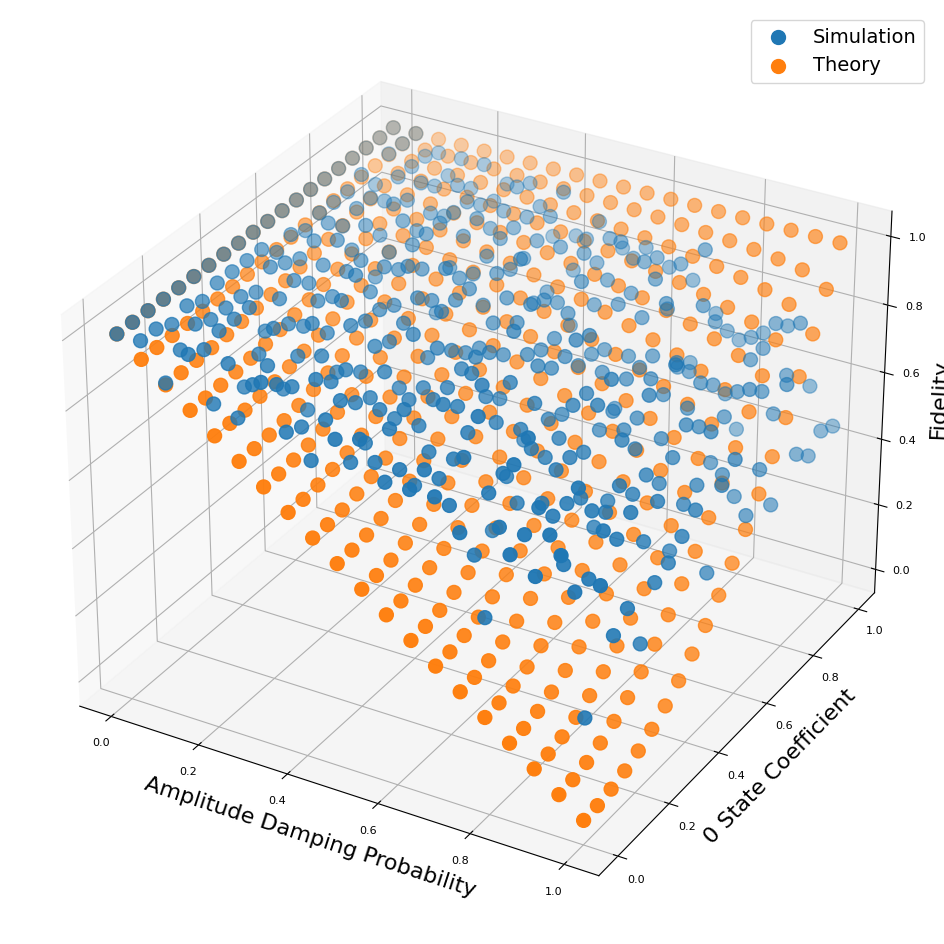

In [ ]:
def theoretical_value(a, p): return 1 - a**2 * (2 - 2*(1 - p)**(1/2) - 3*p) - p - 2*a**4 * (-1 + (1 - p)**(1/2) + p)

a_values = np.linspace(0, 1, 20)
noise_probabilities = np.linspace(0, 1, 20)

fidelities = []
theoretical_fidelities = []

# Loop through all states being considered
for a in a_values:

  fidelities += [[]]
  # Loop through all noise values being considered
  for prob in noise_probabilities:

    # 1. PREPARE QUBITS
    #===================
    # Create qubits
    q0 = cirq.NamedQubit('state 0')
    q1 = cirq.NamedQubit('state 1')
    ancilla = cirq.NamedQubit('anc')

    # Prepare the given states
    circuit_0 = cirq.Circuit()
    circuit_0.append(cirq.H(q0))

    circuit_1 = cirq.Circuit()
    circuit_1.append(cirq.H(q1))

    circuit = circuit_0 + circuit_1.with_noise(cirq.amplitude_damp(prob))


    # 2. SWAP TEST CIRCUIT
    #======================
    # Put ancilla in superposition
    circuit.append(cirq.H(ancilla))

    # Controlled-Swap controlled by ancilla and targeting q0 and q1
    circuit.append(cirq.CSWAP(ancilla, q0, q1))

    # Apply an H gate on the ancilla.
    circuit.append(cirq.H(ancilla))

    # Measure ancilla
    circuit.append(cirq.measure(ancilla))



    # 3. RUN CIRCUIT
    #================
    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=100)



    # 4. CALCULATE FIDELITY
    #=======================
    prob_0 = np.sum(result.measurements['anc']) / len(result.measurements['anc'])
    fidelity = 1 - 2*prob_0

    fidelities[-1] += [fidelity]



  # THEORETICAL VALUES
  #====================
  theoretical_fidelities += [[theoretical_value(a, p) for p in noise_probabilities]]



# PLOT THE RESULTS
#==================
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure
fig = plt.figure(figsize = (12, 12))

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
X, Y = np.meshgrid(noise_probabilities, a_values)
ax.scatter(X, Y, np.array(fidelities), label = 'Simulation', s = 100)
ax.scatter(X, Y, np.array(theoretical_fidelities), label = 'Theory', s = 100)

# Adding labels
ax.set_xlabel('Amplitude Damping Probability', fontsize = 16)
ax.set_ylabel('0 State Coefficient', fontsize = 16)
ax.set_zlabel('Fidelity', fontsize = 16)

# Show the plot
plt.legend(fontsize = 14)
plt.show()

#End of notebook
---
© 2024 The Coding School, All rights reserved